In [1]:
import pandas as pd

# Analisis básico

En esta notebook se hace un análisis muy básico de la data

No tiene que hacer nada más que entenderla

In [2]:
df = pd.read_csv('data/acetylcholinesterase_02_bioactivity_data_preprocessed.csv')

In [3]:
df

,molecule_chembl_id,canonical_smiles,standard_value,standard_value_norm,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.000,750.000,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.000,100.000,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.000,50000.000,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.000,300.000,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.000,800.000,6.096910
...,...,...,...,...,...
6152,CHEMBL5219841,COc1cccc2c1CCCC2NS(=O)(=O)NC(=O)OCc1ccccc1,0.209,0.209,9.679854
6153,CHEMBL5219046,CC[C@@]1(c2cccc(OC(=O)Nc3ccccc3)c2)CCCCN(C)C1,274.000,274.000,6.562249
6154,CHEMBL5219594,O=c1[nH]c2ccc(OCc3ccc(F)cc3)cc2c(=O)o1,76200.000,76200.000,4.118045
6155,CHEMBL5219958,CC(C)c1ccc(COc2ccc3[nH]c(=O)oc(=O)c3c2)cc1,55000.000,55000.000,4.259637


In [4]:
df['molecule_chembl_id'].unique().shape

(6157,)

In [5]:
# Rango dinámico del standar value
df['standard_value'].max(), df['standard_value'].min()

(49600000.0, 0.0)

# Histograma de longitudes de los smiles

In [6]:
df['canonical_len'] = df['canonical_smiles'].apply(lambda x: len(x))

<AxesSubplot:>

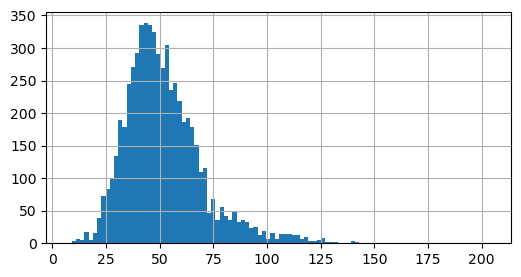

In [7]:
df['canonical_len'].hist(bins=100,figsize=(6,3))

In [8]:
# Max y min 
max_sequence_len = df['canonical_len'].max()
max_sequence_len, df['canonical_len'].min()

(204, 7)

In [9]:
max_len_idx = df['canonical_len'].argmax()
min_len_idx = df['canonical_len'].argmin()

In [10]:
# Ejemplo de molécula más larga
df.iloc[max_len_idx].canonical_smiles

'C[C@@]12CC[C@@H]3[C@]4(CC[C@H]5[C@@]3(C)CCC[C@@]5(C)C(=O)OCC[N+](C)(C)CCCCCCCCC[N+](C)(C)CCOC(=O)[C@]3(C)CCC[C@@]5(C)[C@@H]6CC[C@@]7(C)C[C@]6(CC[C@@H]53)C[C@H]7OC(=O)CCCCCCCCC(=O)O[C@@H]1C4)C2.[Br-].[Br-]'

In [11]:
# Ejemplo de molécula más corta
df.iloc[min_len_idx].canonical_smiles

'NC(=O)O'

# Histograma de caracteres

In [12]:
from collections import Counter

In [13]:
text = ''
for cs in df['canonical_smiles']:
    text = text + cs

In [14]:
vocab_hist = dict(Counter(text))

In [15]:
vocab_hist

{'C': 67210,
 'O': 15404,
 'c': 79242,
 '1': 18088,
 'n': 4997,
 '(': 25466,
 '-': 2269,
 '2': 14598,
 '3': 9023,
 ')': 25466,
 '=': 9411,
 'o': 854,
 'N': 11198,
 'l': 1650,
 'S': 672,
 'F': 1315,
 '[': 6469,
 '@': 4906,
 'H': 2755,
 ']': 6469,
 '/': 1920,
 '\\': 399,
 '+': 1365,
 '.': 1377,
 'B': 730,
 'r': 706,
 '4': 3762,
 '#': 377,
 'I': 120,
 's': 296,
 '5': 1052,
 '6': 248,
 'P': 36,
 'a': 1,
 '7': 18,
 '8': 4,
 'e': 35,
 'i': 2}